<a href="https://colab.research.google.com/github/JaoVSantos/microdadosenem2020/blob/main/MICRODADOS_ENEM_2020(Data_analytics).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
#Lendo dos dados em CSV da planilha e também codificando para que não haja problemas de formato
#sep = Separação por ; dos dados // encoding = codificador dos dados da planilha.
dados = pd.read_csv('MICRODADOS_ENEM_2020.csv', sep=';', encoding="ISO-8859-1")

#PROCESSO DE LIMPEZA, ORGANIZAÇÃO E MELHORA DO DATASET. (DATA wrangling)

In [85]:
#Filtrando as colunas para melhor analise.

dados.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA',
       'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', '

In [86]:
#Como há muitas colunas desnecessarias, iremos adaptar as colunas para melhor trabalho.

DadosEnem = ['TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_COR_RACA',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'NU_NOTA_REDACAO','NU_NOTA_MT',
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'NU_NOTA_REDACAO']

In [87]:
#AGORA VAMOS PEGAR A COLUNA RACIAL E DAR VALORES A ESSES NÚMEROS

cor = {
               0 : "Não Declarado",
               1 : "Branco",
               2 : "Preto",
               3:  "Pardo",
               4 : "Amarelo",
               5 : "Indígena"
               }
               
                 
dados["TP_COR_RACA"] = dados["TP_COR_RACA"].replace(cor)

print(cor)

{0: 'Não Declarado', 1: 'Branco', 2: 'Preto', 3: 'Pardo', 4: 'Amarelo', 5: 'Indígena'}


In [88]:
#VAMOS ADICIONAR AS COLUNAS APENAS AS QUE VAMOS TRABALHAR.

Data = dados.filter(DadosEnem)

In [89]:
Data.head(3)

,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,...,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_REDACAO,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO
0,11,F,Preto,1,11,1,NaN,0,NaN,NaN,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,11,M,Pardo,1,11,1,NaN,0,NaN,NaN,...,1,1,1,1,580.0,711.3,604.1,661.7,595.3,580.0
2,4,F,Pardo,2,0,2,1.0,0,2927408.0,Salvador,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
#Vamos tirar todos os valores NAN(NOT A NUMBER) Que são os valores de quem não foi.

Data = Data.dropna()

In [91]:
#Vamos pegar os valores das 5 notas do enem e fazer a media para uma nota geral.

Data = Data.assign(media=0)
Data.head(1)

,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,...,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_REDACAO,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,media
3,2,M,Pardo,2,0,2,1.0,0,3547304.0,Santana de Parnaíba,...,1,1,1,760.0,759.4,620.8,675.0,624.2,760.0,0


In [92]:
#Com a coluna media adicionada, vamos faze-lá funcionar.
#Fazer o somatorio das colunas das 5 notas e / 5.

lista = ['NU_NOTA_MT',
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'NU_NOTA_REDACAO','media']
ListaNotas = dados.filter(items=lista)

In [93]:
ListaNotas = ListaNotas.assign(media=0)
ListaNotas.head(5)

,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,media
0,NaN,NaN,NaN,NaN,NaN,0
1,711.3,604.1,661.7,595.3,580.0,0
2,NaN,NaN,NaN,NaN,NaN,0
3,759.4,620.8,675.0,624.2,760.0,0
4,NaN,NaN,NaN,NaN,NaN,0


In [94]:
ListaNotas.dropna()

,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,media
1,711.3,604.1,661.7,595.3,580.0,0
3,759.4,620.8,675.0,624.2,760.0,0
5,526.7,498.1,604.7,505.4,700.0,0
7,753.2,604.6,604.8,562.1,600.0,0
8,448.5,439.7,383.5,486.2,600.0,0
...,...,...,...,...,...,...
760034,673.4,636.0,708.0,605.2,920.0,0
760036,664.5,592.8,637.2,632.9,860.0,0
760038,537.7,434.7,550.6,581.1,480.0,0
760039,462.7,563.0,522.7,607.6,440.0,0


In [95]:
dados['media'] = (ListaNotas['NU_NOTA_CH'] + ListaNotas['NU_NOTA_CN']+ ListaNotas['NU_NOTA_MT'] + 
                       ListaNotas['NU_NOTA_REDACAO'] + ListaNotas['NU_NOTA_LC'])//5

In [96]:
ListaNotas.head(5)

,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,media
0,NaN,NaN,NaN,NaN,NaN,0
1,711.3,604.1,661.7,595.3,580.0,0
2,NaN,NaN,NaN,NaN,NaN,0
3,759.4,620.8,675.0,624.2,760.0,0
4,NaN,NaN,NaN,NaN,NaN,0


In [97]:
ListaNotas.dropna()

,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,media
1,711.3,604.1,661.7,595.3,580.0,0
3,759.4,620.8,675.0,624.2,760.0,0
5,526.7,498.1,604.7,505.4,700.0,0
7,753.2,604.6,604.8,562.1,600.0,0
8,448.5,439.7,383.5,486.2,600.0,0
...,...,...,...,...,...,...
760034,673.4,636.0,708.0,605.2,920.0,0
760036,664.5,592.8,637.2,632.9,860.0,0
760038,537.7,434.7,550.6,581.1,480.0,0
760039,462.7,563.0,522.7,607.6,440.0,0


#Agora Entraremos na parte de analise de dados e também graficos.

In [98]:
#Media de nota entre sexo masculino e feminino.
NotaSexo = ['TP_SEXO','media']

NotaSexo = dados.filter(items=NotaSexo)

NotaSexo

,TP_SEXO,media
0,F,NaN
1,M,630.0
2,F,NaN
3,M,687.0
4,F,NaN
...,...,...
760037,F,NaN
760038,M,516.0
760039,F,519.0
760040,F,650.0


In [99]:
NotaSexo = NotaSexo.dropna()

In [100]:
mediana = NotaSexo.groupby('TP_SEXO').median()
mediana

,media
TP_SEXO,
F,525.0
M,543.0


In [101]:
NotaSexo.groupby('TP_SEXO').describe()

media                                                        
            count        mean        std  min    25%    50%    75%    max
TP_SEXO                                                                  
F        298140.0  536.148313  92.511235  0.0  467.0  525.0  599.0  846.0
M        150154.0  549.844673  96.597361  0.0  479.0  543.0  617.0  852.0

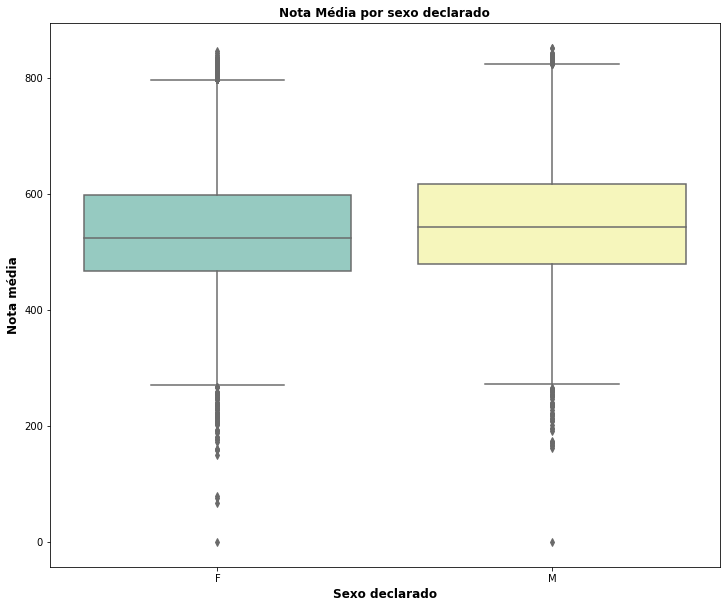

In [102]:
#Agora vamos analisar graficamente os dados das medias entre os sexos.
media = 'media'

fig, ax = plt.subplots(figsize=(12,10))

sns.boxplot(x="TP_SEXO", y=media, data=dados,
           palette="Set3", ax=ax)

ax.set_title("Nota Média por sexo declarado", fontsize=12, fontweight='bold')
ax.set_ylabel("Nota média", fontsize=12, fontweight='bold')
ax.set_xlabel("Sexo declarado", fontsize=12, fontweight='bold')

plt.show()

In [103]:
#Agora um grafico para analizarmos a media das pessoas por etnia/raça.

NotasCor = ['TP_COR_RACA','media']
NotasCor = dados.filter(items=NotasCor)

In [104]:
NotasCor.head(4)

,TP_COR_RACA,media
0,Preto,NaN
1,Pardo,630.0
2,Pardo,NaN
3,Pardo,687.0


In [105]:
NotasCor = NotasCor.dropna()

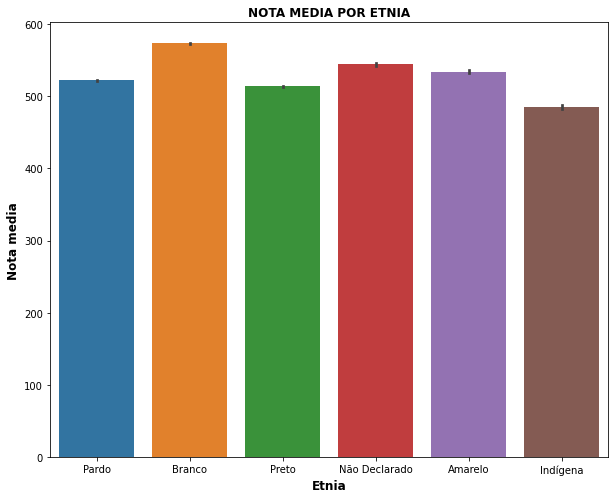

In [106]:
#Desenhando também os graficos por etnia

fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(x='TP_COR_RACA', y='media', data=NotasCor)

ax.set_title("NOTA MEDIA POR ETNIA", fontsize=12, fontweight='bold')
ax.set_xlabel("Etnia", fontsize=12, fontweight='bold')
ax.set_ylabel("Nota media", fontsize=12, fontweight='bold')

plt.show()

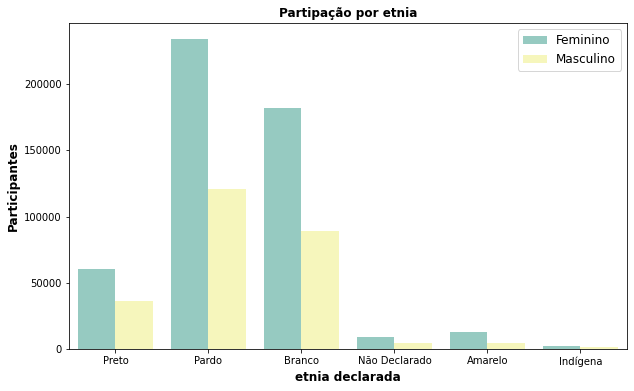

In [121]:
#Fazendo a função dos dados, conseguimos tirar.

fig, ax = plt.subplots(figsize=(10, 6))


sns.countplot(data=dados, x="TP_COR_RACA",
            hue="TP_SEXO", palette="Set3", ax=ax)


ax.set_title("Partipação por etnia", fontsize=12, fontweight='bold')
ax.set_ylabel("Participantes", fontsize=12, fontweight='bold')
ax.set_xlabel("etnia declarada", fontsize=12, fontweight='bold') 
ax.legend(["Feminino", "Masculino"], fontsize=12)